In [1]:
import geopandas as gpd
import rioxarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
from matplotlib_scalebar.scalebar import ScaleBar

In [2]:
# Read in the PFT data
shp = gpd.read_file("SHP/Suisun.shp")

In [3]:
# add new column and reclassify
shp["PFT"] = 0
shp.PFT[shp.CalVegName.isin(["Saltbush", "Pickleweed-Cordgrass"])] = "Pickleweed-Cordgrass-Saltbush"
shp.PFT[shp.CalVegName.isin(["Tule-Cattail"])] = "Tule-Cattail"
shp.PFT[shp.CalVegName.isin(["Wet Meadows"])] = "Wet Meadows"
#shp.PFT[shp.CalVegName.isin(["Annual Grasses and Forbs"])] = "Annual Grassland"
shp.PFT[shp.CalVegName.isin(["Annual Grasses and Forbs","Perennial Grasses and Forbs", "Non-Native/Invasive Grass"])] = "Grassland"
shp.PFT[shp.CalVegName.isin(["Coast Live Oak", "Coyote Brush", "Eucalyptus", "Non-Native/Ornamental Shrub", "North Coastal Scrub", "Non-Native/Ornamental Hardwood",
                            "Riparian Mixed Shrub", "Baccharis (Riparian)", "Tamarisk"])] = "Other"
# not to be included in all analysis
shp.PFT[shp.CalVegName.isin(["Urban or Developed, Urban-related", "Urban or Developed, Urban-Related Bare Soil"])] = "Urban or developed"
shp.PFT[shp.CalVegName.isin(["Agriculture"])] = "Agriculture"
shp.PFT[shp.CalVegName.isin(["Water", "Developed Water Feature"])] = "Water"
shp.PFT[shp.CalVegName.isin(["Water, Bays or Estuaries"])] = "Bay"
shp.PFT[shp.CalVegName.isin(["Barren"])] = "Barren"
shp.PFT[shp.CalVegName.isin(["Willow", "Willow (Shrub)"])] = "Willow"

/tmp/ipykernel_5805/2274999647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shp.PFT[shp.CalVegName.isin(["Saltbush", "Pickleweed-Cordgrass"])] = "Pickleweed-Cordgrass-Saltbush"


In [4]:
shp.PFT.unique()

array(['Pickleweed-Cordgrass-Saltbush', 'Tule-Cattail', 'Wet Meadows',
       'Barren', 'Grassland', 'Water', 'Other', 'Urban or developed',
       'Bay', 'Agriculture', 'Willow'], dtype=object)

In [5]:
# Dissolve shapefile according to PFT
pft = shp.dissolve(by="PFT")

In [6]:
pft.to_file("SHP/Suisun_PFT_diss.shp")
#del pft

### Test new shapefile and plot PFTs

In [5]:
# load Suisun area
#susun = gpd.read_file('SHP/Suisun_diss.shp')
#suisun = suisun.to_crs(suisunPFT.crs)
# delate Agriculture, Anual Grasess and Forbs, and Eucapyptus
#shp = suisunPFT.drop([0, 5])
#shp2 = suisunPFT.iloc[[0, 5]]
# load example areas
area = gpd.read_file('SHP/Suisun_diss.shp')

In [ ]:
shp2 = pft[~shp.PFT.isin(["Urban or developed", "Agriculture", "Bay"])]
shp3 = pft[shp.PFT.isin(["Urban or developed", "Agriculture", "Bay"])]

Text(0.5, 1.0, 'Vegetation types')

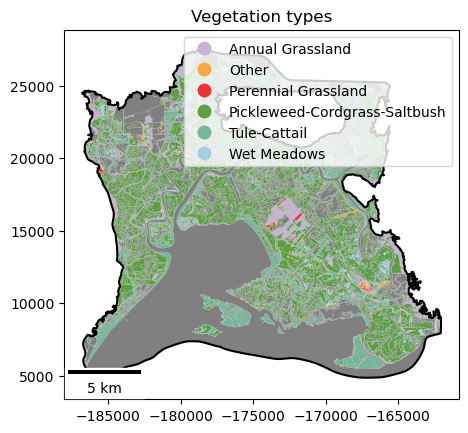

In [11]:
cmapp = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']
cmapp = pltc.LinearSegmentedColormap.from_list(shp.PFT, cmapp[::-1])

fig, ax = plt.subplots()
area.boundary.plot(ax=ax, color='black')
shp.plot(column='PFT', ax=ax, cmap=cmapp, legend=True)
shp2.plot(ax=ax, color='grey')
#area.boundary.plot(ax=ax, color='red')
#plt.tight_layout()
scalebar = ScaleBar(1, location='lower left')
plt.gca().add_artist(scalebar)
plt.title('Vegetation types')
#plt.savefig("figures/vegetationTypes.svg")